# Setup & Data Load

In [1]:
import os
import google.generativeai as genai
from google.colab import userdata
genai.configure(api_key=userdata.get('Mexa'))
model = genai.GenerativeModel('gemini-pro')

Download the dataset, taken from https://github.com/primate-mh/Primate2022.git

**References:** Gupta, S., Agarwal, A., Gaur, M., Roy, K., Narayanan, V., Kumaraguru, P., & Sheth, A. (2022). Learning to automate follow-up question generation using process knowledge for depression triage on reddit posts. arXiv preprint arXiv:2205.13884.


In [2]:
!curl https://raw.githubusercontent.com/mmervecerit/mexa-hackathon/refs/heads/main/primate_dataset.json -o primate_dataset.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4752k  100 4752k    0     0  4814k      0 --:--:-- --:--:-- --:--:-- 4815k


In [3]:
import pandas as pd

data_org=pd.read_json('/content/primate_dataset.json')


# Explore and Preprocess the Data

In [4]:
data_org.head()

,post_title,post_text,annotations
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,[[Feeling-bad-about-yourself-or-that-you-are-a...
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",[[Feeling-bad-about-yourself-or-that-you-are-a...
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,[[Feeling-bad-about-yourself-or-that-you-are-a...


In [ ]:
data_org['post_title'][0]

"I don't feel original anymore."

In [ ]:
data_org['post_text'][0]

"When I was in high school a few years back, I was one of the highest competitors in my school. I joined the high school band in freshman year and by senior year I became one of the best in my section. My academics were always straight and I exercised daily. Senior year I enlisted in the military and now I believe it was one of my worst decisions in life. Before I went to boot camp I was motivated, a patriot and believed that the elite joined the military. In senior year I never applied for any scholarships and I was offered one but turned it down because I already signed the papers. I thought I set myself up for success. Now I believe I was dead wrong for joining. The only benefit I see so far after a year and a half of service is that I'm trying to set myself up financially before I get out and hopefully attend college. It sounds like a plan but I feel no happiness from what I do at all. I convinced myself there's no honor in it anymore, it's just another job. I don't exercise by mys

In [ ]:
data_org['annotations'][0]

[['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
  'yes'],
 ['Feeling-down-depressed-or-hopeless', 'no'],
 ['Feeling-tired-or-having-little-energy', 'yes'],
 ['Little-interest-or-pleasure-in-doing ', 'yes'],
 ['Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
  'no'],
 ['Poor-appetite-or-overeating', 'no'],
 ['Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
  'no'],
 ['Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
  'no'],
 ['Trouble-falling-or-staying-asleep-or-sleeping-too-much', 'no']]

In [5]:
for annotation in data_org['annotations']:
    question = annotation[0][0]
    if question not in data_org.columns:
        data_org[question] = 0

# Fill the new columns with binary values
for i, annotation in data_org.iterrows():  # Use iterrows to iterate row by row
    for question, response in annotation['annotations']:
        data_org.at[i, question] = True if response == 'yes' else False

data_org['post']=data_org['post_title']+' '+data_org['post_text']

<ipython-input-5-17e1d5ee193e>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_org.at[i, question] = True if response == 'yes' else False


In [6]:
data_org.head()

,post_title,post_text,annotations,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much,post
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...,True,False,True,True,False,False,False,False,False,I don't feel original anymore. When I was in h...
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...,True,True,False,False,True,False,False,False,False,I don’t have anyone to talk to and I don’t kno...
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,[[Feeling-bad-about-yourself-or-that-you-are-a...,True,True,True,True,False,False,True,False,False,Stuck between moving forward and killing mysel...
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",[[Feeling-bad-about-yourself-or-that-you-are-a...,True,True,False,False,False,False,True,False,False,I need help on how to help my girlfriend. My g...
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,[[Feeling-bad-about-yourself-or-that-you-are-a...,True,True,False,False,False,False,False,False,False,I've been feeling this way for some tine I'm a...


In [7]:
story=data_org['post'][0]

In [8]:
story

"I don't feel original anymore. When I was in high school a few years back, I was one of the highest competitors in my school. I joined the high school band in freshman year and by senior year I became one of the best in my section. My academics were always straight and I exercised daily. Senior year I enlisted in the military and now I believe it was one of my worst decisions in life. Before I went to boot camp I was motivated, a patriot and believed that the elite joined the military. In senior year I never applied for any scholarships and I was offered one but turned it down because I already signed the papers. I thought I set myself up for success. Now I believe I was dead wrong for joining. The only benefit I see so far after a year and a half of service is that I'm trying to set myself up financially before I get out and hopefully attend college. It sounds like a plan but I feel no happiness from what I do at all. I convinced myself there's no honor in it anymore, it's just anoth

In [9]:
data = data_org.sample(n=200, random_state=42)

# Display the resulting sampled data shape
print(f"Sampled dataset shape: {data.shape}")


Sampled dataset shape: (200, 13)


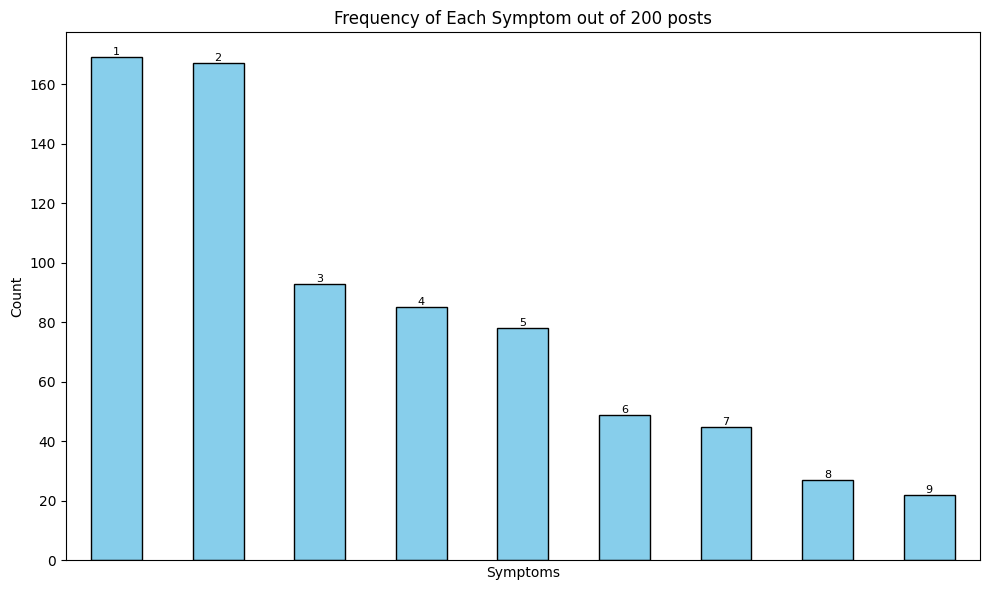

In [10]:
import matplotlib.pyplot as plt
symptom_counts = data.drop(columns=['annotations', 'post', 'post_title', 'post_text']).sum().sort_values(ascending=False)

# Generate the bar plot
plt.figure(figsize=(10, 6))
ax = symptom_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add annotations (column names) on top of the bars
for idx, value in enumerate(symptom_counts):
    ax.text(idx, value, idx+1, ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title(f'Frequency of Each Symptom out of {len(data)} posts')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks([])  # Hide the x-axis ticks to avoid redundancy
plt.tight_layout()
plt.show()

# Prompt and Run the Model

In [13]:
config = genai.GenerationConfig(
    max_output_tokens=2048, temperature=0.0
)


In [11]:
def extract_text(response):
    if response.candidates is None:
        return None
    elif len(response.candidates) == 0:
        return None
    elif len(response.candidates[0].content.parts) == 0:
        return None
    elif len(response.candidates[0].content.parts[0].text) == 0:
        return None
    else:
      return response.candidates[0].content.parts[0].text

In [14]:
data["gemini_response"] = data['post'].apply(lambda x:  extract_text(model.generate_content(f'''You are a clinical psychologist expert in depressive symptoms.

    Based on the PHQ-9 Scale provided below, analyze the patient's story and determine whether the answer to each question can be deduced using the content in the story. For each question, strictly base your answers on direct quotes or clear paraphrasing from the story. Avoid making assumptions or inferring details not explicitly stated by the patient.

    After providing the analysis for each question, write one acknowledgement sentence to ensure the patient feels heard and one follow-up question to gather more insight into their symptoms.

    Finally, summarize the analysis with a numbered True/False list, indicating whether each question could be answered based on the story.

    The PHQ-9 questionnaire assesses depression based on these 9 questions:
    1. Feeling bad about yourself, or that you are a failure, or have let yourself or your family down.
    2. Feeling down, depressed, or hopeless.
    3. Feeling tired, or having little energy.
    4. Little interest or pleasure in doing things.
    5. Moving or speaking so slowly that other people could have noticed, or the opposite, being so fidgety or restless that you have been moving around a lot more than usual.
    6. Poor appetite or overeating.
    7. Thoughts that you would be better off dead or of hurting yourself in some way.
    8. Trouble concentrating on things such as reading the newspaper or watching television.
    9. Trouble falling or staying asleep, or sleeping too much.

    Patient's story: {x}

    Output Format:
    1. Can the question be answered/deduced only using Patient's story provided above? [True/False]
       - If True, Evidence: [Direct quote from Patient's story]
       - Explanation: [Brief explanation]
    2. [True/False]
       - If True, Evidence: [Direct quote from Patient's story]
       - Explanation: [Brief explanation]
    ...
    Acknowledgement: [Insert one sentence to acknowledge the patient's feelings, based on their story.]
    Follow-up Question: [Insert the best follow-up question to gather more insight into their symptoms.]
    Summary: 1: [True/False], 2: [True/False], 3: [True/False], 4: [True/False], 5: [True/False], 6: [True/False], 7: [True/False], 8: [True/False], 9: [True/False]

    Example Patient Story:
    Lately I've been feeling really low. I can't make myself leave the bed, I start crying out of the blue, and everything is just so heavy. I think I've always suffered from some kind of depression, but I've never been to therapy because I couldn't afford it on my own and my family didn't ever suspect anything. Now I live on my own in another city. Yesterday I discovered that my university provides psychological help for students for free. Do you think I should give it a go? I'm a bit afraid because I don't know what to expect and I don't really know what to tell them when I'll be there. I know they don't provide help for very serious issues (you'll need a psychiatrist for that), and I hope they don't take care of only "university related problems." On the other hand, I have nothing to lose because it's free. Did you ever try anything like that?

    Example Output:
    1. True
       - Evidence: "I start crying out of the blue and everything is just so heavy."
       - Explanation: The patient describes feelings that suggest they feel bad about themselves or as though they have let themselves down.
    2. True
       - Evidence: "Lately I've been feeling really low."
       - Explanation: The patient explicitly mentions feeling depressed.
    3. True
       - Evidence: "I can't make myself leave the bed."
       - Explanation: The statement implies fatigue or lack of energy.
    4. True
       - Evidence: "Everything is just so heavy."
       - Explanation: The patient describes a lack of pleasure or motivation in daily activities.
    5. False
       - Evidence: [No direct statement provided in the story.]
       - Explanation: There is no mention of changes in movement or restlessness.
    6. False
       - Evidence: [No direct statement provided in the story.]
       - Explanation: Appetite or eating habits are not discussed.
    7. False
       - Evidence: [No direct statement provided in the story.]
       - Explanation: The patient does not discuss thoughts of self-harm or feeling better off dead.
    8. False
       - Evidence: [No direct statement provided in the story.]
       - Explanation: Concentration issues are not mentioned.
    9. True
       - Evidence: "I can't make myself leave the bed."
       - Explanation: This suggests difficulty with sleep or excessive sleeping.

    Acknowledgement: It sounds like you're experiencing a lot of emotional and physical heaviness, and I'm glad you felt comfortable sharing this.
    Follow-up Question: Can you tell me more about your energy levels throughout the day or how your sleep patterns have been recently?
    Summary: 1: True, 2: True, 3: True, 4: True, 5: False, 6: False, 7: False, 8: False, 9: True
    ''',generation_config=config)))


In [16]:
data.to_csv('results.csv', index=False)

# Explore the Results

In [24]:
data["gemini_response"] = data["gemini_response"].astype(str)


In [40]:
import re
def parse_gemini_response(response):
    try:
        # Extract Acknowledgement
        ack_match = re.search(r"Acknowledgement: (.+?)\n", response)
        acknowledgement = ack_match.group(1) if ack_match else None

        # Extract Follow-up Question
        followup_match = re.search(r"Follow-up Question: (.+?)\n", response)
        follow_up_question = followup_match.group(1) if followup_match else None

        # Extract Summary
        summary_match = re.search(r"Summary: (.+)", response)
        summary = summary_match.group(1) if summary_match else None

        # Parse the Summary into individual numbers
        summary_values = re.findall(r"(\d+): (True|False)", summary) if summary else []
        summary_dict = {f"Summary_{num}": val for num, val in summary_values}

        return acknowledgement, follow_up_question, summary, summary_dict
    except Exception as e:
        # If parsing fails, return NA
        return None, None, None, {}

data["Acknowledgement"], data["Follow_up_Question"], data["Summary"], summary_dicts = zip(
    *data["gemini_response"].apply(parse_gemini_response)
)


In [43]:
data

,post_title,post_text,annotations,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television,Trouble-falling-or-staying-asleep-or-sleeping-too-much,post,gemini_response,Acknowledgement,Follow_up_Question,Summary
0,How do you pull yourself together when you're ...,Hello. I (23F) have tried to make a post to ex...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,True,False,False,False,True,False,How do you pull yourself together when you're ...,"1. True\n - Evidence: ""I feel like I am lett...",I understand that you're struggling with a lac...,Can you describe how your mood has been affect...,"1: True, 2: True, 3: True, 4: True, 5: False, ..."
1,Girlfriend left me and now I'm terrified my de...,"Hello,\n\nToday my girlfriend decided we will ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,False,False,False,Girlfriend left me and now I'm terrified my de...,"1. True\n - Evidence: ""I've battled anxiety ...",I understand that you're going through a diffi...,Can you tell me more about how your anxiety ha...,"1: True, 2: True, 3: False, 4: False, 5: False..."
2,Just so tired of being depressed,Not really sure where to even start with this ...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,True,False,False,Just so tired of being depressed Not really su...,"1. True\n - Evidence: ""I just find that the ...",I understand that you're feeling a lot of hope...,Can you tell me more about your relationships ...,"1: True, 2: True, 3: True, 4: True, 5: False, ..."
3,Am I to blame for my boyfriends depression?,Me and my boyfriend have a really good relatio...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,False,True,True,False,False,False,Am I to blame for my boyfriends depression? Me...,"1. True\n - Evidence: ""He said he feels like...",I understand that you're feeling very anxious ...,Can you tell me more about how your boyfriend'...,"1: True, 2: True, 3: False, 4: True, 5: False,..."
4,how am I supposed to live in a world like ours?,"So much pain. So much suffering. So much loss,...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,False,False,False,how am I supposed to live in a world like ours...,"1. True\n - Evidence: ""How am I supposed to ...",I understand that you're feeling overwhelmed b...,Can you tell me more about how these feelings ...,"1: True, 2: True, 3: False, 4: True, 5: False,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A friend you’re worrying about hasn’t been rep...,"My friend gets really lonely, especially aroun...",[['Feeling-bad-about-yourself-or-that-you-are-...,False,True,False,False,False,False,False,False,False,A friend you’re worrying about hasn’t been rep...,"1. True\n - Evidence: ""I feel worried and sa...",I understand that you're feeling concerned abo...,Have you noticed any other changes in your fri...,"1: True, 2: False, 3: False, 4: False, 5: Fals..."
196,"I can’t help myself, and there is nowhere to g...","Things keep getting worse. I am not suicidal, ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,True,True,True,False,False,"I can’t help myself, and there is nowhere to g...","1. True\n - Evidence: ""I can’t help myself, ...",I understand that you're going through a diffi...,Can you tell me more about your thoughts and f...,"1: True, 2: True, 3: True, 4: True, 5: False, ..."
197,I'm scared...,I have been depr

In [44]:
def parse_summary(summary):
    # Use regex to extract key-value pairs
    summary_dict = dict(re.findall(r"(\d+): (True|False)", str(summary)))
    return summary_dict

# Apply parsing function to the Summary column
parsed_summaries = data["Summary"].apply(parse_summary)


In [46]:
summary_df = pd.DataFrame(list(parsed_summaries))


In [48]:
data = pd.concat([data, summary_df.add_prefix("Summary_")], axis=1)

In [49]:
data

,post_title,post_text,annotations,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,...,Summary,Summary_1,Summary_2,Summary_3,Summary_4,Summary_5,Summary_6,Summary_7,Summary_8,Summary_9
0,How do you pull yourself together when you're ...,Hello. I (23F) have tried to make a post to ex...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,True,False,False,False,...,"1: True, 2: True, 3: True, 4: True, 5: False, ...",True,True,True,True,False,False,False,False,False
1,Girlfriend left me and now I'm terrified my de...,"Hello,\n\nToday my girlfriend decided we will ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,False,...,"1: True, 2: True, 3: False, 4: False, 5: False...",True,True,False,False,False,False,False,False,False
2,Just so tired of being depressed,Not really sure where to even start with this ...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,True,...,"1: True, 2: True, 3: True, 4: True, 5: False, ...",True,True,True,True,False,False,False,False,False
3,Am I to blame for my boyfriends depression?,Me and my boyfriend have a really good relatio...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,False,True,True,False,...,"1: True, 2: True, 3: False, 4: True, 5: False,...",True,True,False,True,False,True,False,False,False
4,how am I supposed to live in a world like ours?,"So much pain. So much suffering. So much loss,...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,False,...,"1: True, 2: True, 3: False, 4: True, 5: False,...",True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A friend you’re worrying about hasn’t been rep...,"My friend gets really lonely, especially aroun...",[['Feeling-bad-about-yourself-or-that-you-are-...,False,True,False,False,False,False,False,...,"1: True, 2: False, 3: False, 4: False, 5: Fals...",True,False,False,False,False,False,False,False,False
196,"I can’t help myself, and there is nowhere to g...","Things keep getting worse. I am not suicidal, ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,True,True,True,...,"1: True, 2: True, 3: True, 4: True, 5: False, ...",True,True,True,True,False,False,True,False,False
197,I'm scared...,I have been depressed for the past half-year a...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,True,False,False,True,...,"1: True, 2: True, 3: False, 4: False, 5: False...",True,True,False,False,False,False,True,False,False
198,my boyfriend is the only thing keeping me sane...,im in a long distance relationship with the mo...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,False,...,"1: True, 2: True, 3: False, 4: False, 5: False...",True,True,False,False,False,False,False,False,False


In [58]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Define the mapping between Summary columns and question columns
mapping = {
    'Summary_1': 'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
    'Summary_2': 'Feeling-down-depressed-or-hopeless',
    'Summary_3': 'Feeling-tired-or-having-little-energy',
    'Summary_4': 'Little-interest-or-pleasure-in-doing ',
    'Summary_5': 'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
    'Summary_6': 'Poor-appetite-or-overeating',
    'Summary_7': 'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
    'Summary_8': 'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
    'Summary_9': 'Trouble-falling-or-staying-asleep-or-sleeping-too-much'
}

# Initialize a results dictionary
results = []

# Perform precision-recall classification metrics for each pair
for summary_col, question_col in mapping.items():
    # Ensure proper boolean comparison
    y_pred = data[summary_col].astype(str).str.lower() == 'true'  # Predicted
    y_true = data[question_col].astype(str).str.lower() == 'true'  # Ground truth

    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary', zero_division=0
    )

    # Append results
    results.append({
        'Metric': summary_col,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert results to a DataFrame
metrics_df = pd.DataFrame(results)



In [74]:
metrics_df['Q']=metrics_df['Metric'].apply(lambda x: x.split('_')[1])

In [72]:
question_mapping = {
    '1': 'Feeling bad about yourself or that you are a failure or have let yourself or your family down',
    '2': 'Feeling down, depressed, or hopeless',
    '3': 'Feeling tired or having little energy',
    '4': 'Little interest or pleasure in doing things',
    '5': 'Moving or speaking so slowly that other people could have noticed, or the opposite, being so fidgety or restless that you have been moving around a lot more than usual',
    '6': 'Poor appetite or overeating',
    '7': 'Thoughts that you would be better off dead or of hurting yourself in some way',
    '8': 'Trouble concentrating on things such as reading the newspaper or watching television',
    '9': 'Trouble falling or staying asleep, or sleeping too much'
}

<ipython-input-75-b4def4fbdc07>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


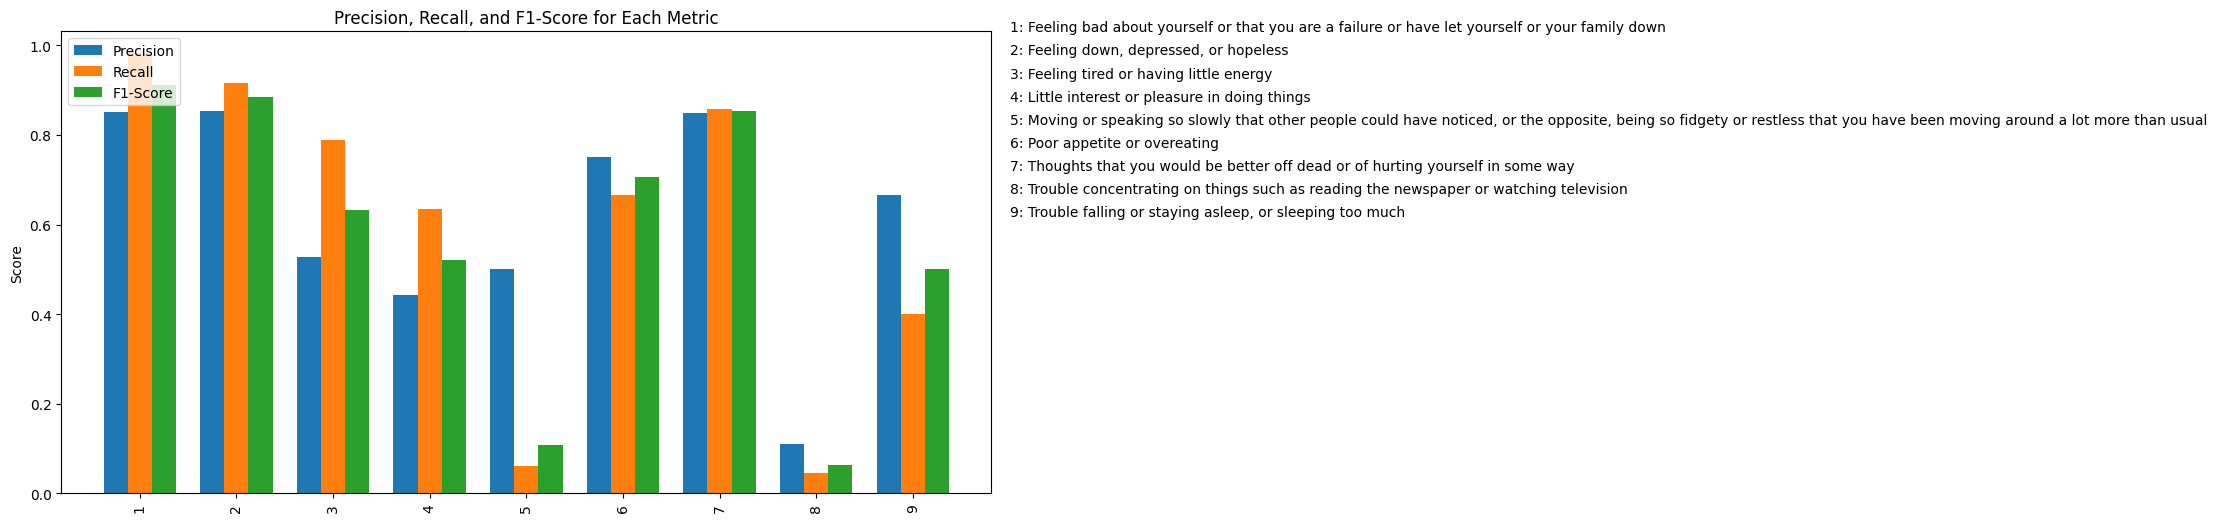

In [75]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.25
x = range(len(metrics_df['Q']))

# Plot each metric
ax.bar([i - bar_width for i in x], metrics_df['Precision'], width=bar_width, label='Precision')
ax.bar(x, metrics_df['Recall'], width=bar_width, label='Recall')
ax.bar([i + bar_width for i in x], metrics_df['F1-Score'], width=bar_width, label='F1-Score')

# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Q'], rotation=90)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for Each Metric')
ax.legend()

# Create a custom legend with the actual questions
custom_legend = [f"{metric}: {question_mapping[metric]}" for metric in metrics_df['Q']]
for metric, text in zip(metrics_df['Q'], custom_legend):
    ax.text(1.02, 1 - 0.05 * list(metrics_df['Q']).index(metric), text, transform=ax.transAxes, fontsize=10, ha='left')

ax.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix

for summary_col, question_col in mapping.items():
    y_pred = data[summary_col].astype(str).str.lower() == 'true'
    y_true = data[question_col].astype(str).str.lower() == 'true'

    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {summary_col}:\n{cm}\n")

Confusion Matrix for Summary_5:
[[148   3]
 [ 46   3]]

Confusion Matrix for Summary_8:
[[170   8]
 [ 21   1]]



In [87]:
# Define mapping for Summary columns and corresponding ground truth
mapping = {
    'Summary_5': 'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
    'Summary_8': 'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television'
}

# Initialize DataFrames to store results
false_positives_df = []
false_negatives_df = []

# Iterate over the mappings to extract cases
for summary_col, question_col in mapping.items():
    # Convert to boolean for proper comparison
    y_pred = data[summary_col].astype(str).str.lower() == 'true'
    y_true = data[question_col].astype(str).str.lower() == 'true'

    # False positives: Predicted True but actually False
    false_positives = data[(y_pred) & (~y_true)].copy()
    false_positives['Type'] = 'False Positive'
    false_positives['Summary'] = summary_col
    false_positives_df.append(false_positives)

    # False negatives: Predicted False but actually True
    false_negatives = data[(~y_pred) & (y_true)].copy()
    false_negatives['Type'] = 'False Negative'
    false_negatives['Summary'] = summary_col
    false_negatives_df.append(false_negatives)

# Concatenate all cases into a single DataFrame
false_positives_df = pd.concat(false_positives_df)
false_negatives_df = pd.concat(false_negatives_df)


In [88]:
false_positives_df

,post_title,post_text,annotations,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,...,Summary_1,Summary_2,Summary_3,Summary_4,Summary_5,Summary_6,Summary_7,Summary_8,Summary_9,Type
22,How can I (28f) help my Mum (56f) who is depre...,My Mum has struggled with severe depression ev...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,False Positive
44,Do I have depression or something else?,"Hi everyone, please don't bite my head off as ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,True,...,True,True,True,True,True,False,True,True,True,False Positive
184,I want some coping mechanisms for restlessness...,I have been thinking of self harming. I don't ...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,True,False,False,True,...,True,True,True,True,True,False,True,False,False,False Positive
22,How can I (28f) help my Mum (56f) who is depre...,My Mum has struggled with severe depression ev...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,False Positive
33,I could use some help figuring out if there‘s ...,This could turn out to be kinda long so I apol...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,True,...,True,True,True,True,False,False,True,True,True,False Positive
44,Do I have depression or something else?,"Hi everyone, please don't bite my head off as ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,True,...,True,True,True,True,True,False,True,True,True,False Positive
55,i think i have depression but i can’t seek med...,"I’m not clinically diagnosed, and can’t get a ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,False,False,True,...,True,True,False,True,False,False,True,True,False,False Positive
105,The days have nothing to offer for me: Looking...,"Hey girls and guys,\n\nI'm suffering from depr...",[['Feeling-bad-about-yourself-or-that-you-are-...,False,True,False,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False Positive
116,I have no reason to be sad and yet here I am,I don’t understand myself right now. I shouldn...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,False,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,False Positive
117,My family keeps pressuring me to find a job an...,I am 22 (f)already and I know I should have fo...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,True,True,False,False,...,True,True,True,True,False,True,False,True,False,False Positive


In [89]:
false_negatives_df

,post_title,post_text,annotations,Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down,Feeling-down-depressed-or-hopeless,Feeling-tired-or-having-little-energy,Little-interest-or-pleasure-in-doing,Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual,Poor-appetite-or-overeating,Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way,...,Summary_1,Summary_2,Summary_3,Summary_4,Summary_5,Summary_6,Summary_7,Summary_8,Summary_9,Type
3,Am I to blame for my boyfriends depression?,Me and my boyfriend have a really good relatio...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,False,True,True,False,...,True,True,False,True,False,True,False,False,False,False Negative
5,I ( 26 female ) have decided to take care of m...,Hey all ! I am new to the group and a Canadia...,[['Feeling-bad-about-yourself-or-that-you-are-...,False,True,True,True,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False Negative
17,I need help.,(Sorry is this is the wrong place to post)\n\n...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,True,False,False,...,True,True,True,True,False,False,False,False,False,False Negative
18,Is there a point?,"I'm 19, super bad social anxiety to the point ...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,True,False,True,...,True,True,True,True,False,False,True,False,False,False Negative
19,Can’t believe we’re almost halfway through the...,"\nStill done nothing, i haven’t left my room s...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,False,True,False,True,False,True,...,True,True,True,True,False,False,True,False,False,False Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,I can't get out of bed.,"If this sounds familiar, please share your tip...",[['Feeling-bad-about-yourself-or-that-you-are-...,True,False,True,True,False,True,False,...,True,True,True,True,False,True,False,False,False,False Negative
155,I'm 16 and I'm a mess,(sorry in advance for bad grammar) \n\nI don't...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,True,False,True,False,False,...,True,True,True,True,False,False,True,False,True,False Negative
169,I feel stuck in a loop,i feel like i’m stuck in a repetitive loop and...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,False,True,False,False,False,True,...,True,True,True,True,False,False,False,False,False,False Negative
182,Can quitting smoking weed help with depression ??,I’ve been smoking heavily since I was 16-17 da...,[['Feeling-bad-about-yourself-or-that-you-are-...,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False Negative


# Demo

In [90]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [94]:
data['post'][0]

"How do you pull yourself together when you're not motivated? Hello. I (23F) have tried to make a post to explain what's going on with me, but I just end up crying, and everything I write is incoherent, so. Sorry if there's not enough context?\n\nI'm having a really difficult time right now. I can't really focus on work, and I don't get in as many hours as I should. I feel like I am letting people down. \n\nExisting is exhausting, and all I can do is waste time on my phone, because if I'm on my phone I don't have to think and time passes more quickly. \nI'm tired of spending hours on my phone instead of doing functional-people things, I'm just putting everything off and setting myself up for failure. But doing anything productive feels too daunting, and I don't know how to start? \n\nI want to develop healthy habits - spend less time on my phone, maybe go outside more often, go on walks, stick to my work schedule, find hobbies. Simple things that I know would improve my mental health.\

In [95]:
data['Acknowledgement'][0]

"I understand that you're struggling with a lack of motivation and feeling overwhelmed."

In [98]:
data['Follow_up_Question'][0]

'Can you describe how your mood has been affecting your daily routine and relationships?'

In [109]:
%%writefile app.py

import streamlit as st
import time

# Assume ask_gemini function and model are already imported and configured
# from your_model_library import ask_gemini

# Configure Streamlit page
st.set_page_config(
    page_title="MindGears Chat Demo",
    page_icon="💬",
    layout="centered",
)

# Sidebar Disclaimer
st.sidebar.warning(
    "This is an AI-powered application and not a substitute for professional mental health support. "
    "If you are experiencing a crisis or need immediate help, please contact a mental health professional or a helpline in your area."
)

# Header
st.title("🧠 MindGears - AI Chat for Mental Health Support")
st.markdown("Enter your story below, and the AI will provide a follow-up question to help understand your experience better.")

# Patient's story input
patient_story = st.text_area(
    "📝 Share your story:",
    placeholder="Start typing here...",
    height=200
)

# AI Processing
if st.button("Submit"):
    if patient_story.strip() == "":
        st.error("Please enter a story before submitting.")
    else:

        with st.spinner("MindGears is analyzing your story... Please wait."):
          # Call ask_gemini to generate a response
          response = "I understand that you're struggling with a lack of motivation and feeling overwhelmed. Can you describe how your mood has been affecting your daily routine and relationships?"

        if response:
            # Display AI response
            st.success("MindGears' Follow-up Question:")
            st.write(response)
        else:
            st.error("MindGears could not generate a response. Please try again.")

# Footer
st.markdown(
    """
    ---
    **Disclaimer:** This is an AI-powered application intended for informational purposes only.
    It does not replace professional mental health services.
    """
)

Overwriting app.py


In [100]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [112]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501

⠙your url is: https://twelve-bats-prove.loca.lt
^C


In [111]:
!curl https://loca.lt/mytunnelpassword

34.55.201.44